In [ ]:
### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')

In [ ]:
### Import the raw data

In [ ]:
data = pd.read_csv('Starbucks satisfactory survey.csv')

In [ ]:
data.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
### Data Pre-processing

In [ ]:
rename_dict = {
    '1. Your Gender' : 'Gender',
    '2. Your Age' : 'Age',     
    '3. Are you currently....?' : 'Profession',
    '4. What is your annual income?' : 'Income',
    '5. How often do you visit Starbucks?' : 'Visit Frequency',
    '6. How do you usually enjoy Starbucks?' : 'Prefered Form of Consumption',
    '7. How much time do you normally  spend during your visit?' : 'Time Spent on Visit',
    "8. The nearest Starbucks's outlet to you is...?" : 'Distance to Store',
    '9. Do you have Starbucks membership card?' : 'Membership',
    '10. What do you most frequently purchase at Starbucks?' : 'Most consumed Product',
    '11. On average, how much would you spend at Starbucks per visit?' : 'Spend per Visit',
    '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Quality Rate',
    '13. How would you rate the price range at Starbucks?' : 'Price Range Rate',
    '14. How important are sales and promotions in your purchase decision?' : 'Sales and Promotion Importance',
    '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance Rate',
    '16. You rate the WiFi quality at Starbucks as..' : 'WiFi Quality Rate',
    '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service Rate',
    '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Likely for Meetings or Hangouts',
    '19. How do you come to hear of promotions at Starbucks? Check all that apply.' : 'Form of communication to Promotions',
    '20. Will you continue buying at Starbucks?' : 'Custumer Loyalty'
}

In [ ]:
### Rename the columns

In [ ]:
data = data.rename(rename_dict,axis=1)
data.head()

,Timestamp,Gender,Age,Profession,Income,Visit Frequency,Prefered Form of Consumption,Time Spent on Visit,Distance to Store,Membership,...,Spend per Visit,Quality Rate,Price Range Rate,Sales and Promotion Importance,Ambiance Rate,WiFi Quality Rate,Service Rate,Likely for Meetings or Hangouts,Form of communication to Promotions,Custumer Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
### Check uniques responses in each column

In [ ]:
for column in data.columns:
    print('{} column: {} unique values'.format(column,data[column].nunique()))

Timestamp column: 122 unique values
Gender column: 2 unique values
Age column: 4 unique values
Profession column: 4 unique values
Income column: 5 unique values
Visit Frequency column: 5 unique values
Prefered Form of Consumption column: 8 unique values
Time Spent on Visit column: 5 unique values
Distance to Store column: 3 unique values
Membership column: 2 unique values
Most consumed Product column: 20 unique values
Spend per Visit column: 4 unique values
Quality Rate column: 5 unique values
Price Range Rate column: 5 unique values
Sales and Promotion Importance column: 5 unique values
Ambiance Rate column: 5 unique values
WiFi Quality Rate column: 5 unique values
Service Rate column: 5 unique values
Likely for Meetings or Hangouts column: 5 unique values
Form of communication to Promotions column: 31 unique values
Custumer Loyalty column: 2 unique values


In [ ]:
### Fix some redundant response in columns with more than 5 uniques response

In [ ]:
data['Prefered Form of Consumption'] = data['Prefered Form of Consumption'].replace({'Never':'None','never':'None','Never buy':'None','Never ':'None','I dont like coffee':'None',np.nan:'None'})
data['Most consumed Product'] = data['Most consumed Product'].replace({'Never buy any':'Nothing','never':'Nothing','Never':'Nothing','Jaws chip ':'Jaws Chip','cake ':'Cake'})
data['Form of communication to Promotions'] = data['Form of communication to Promotions'].replace({np.nan:'Never hear'})

In [ ]:
### Data Visualization

In [ ]:
### Create a simple function to avoid repeative code

In [ ]:
def plot_bar(feature,figsize):
    plot_data = organize_plot_data(feature)
    generate_plot(plot_data,feature,figsize)

def organize_plot_data(feature):
    plot_data = data[['Timestamp',feature]] #Timestamp is used for counting the occurrences
    plot_data = plot_data.groupby(feature).count()
    plot_data = plot_data.reset_index()
    plot_data.columns = [feature,'Counts'] 
    return plot_data

def generate_plot(plot_data,feature,figsize):
    plt.figure(figsize=figsize)
    plt.bar(x = plot_data[feature], height = plot_data['Counts'])
    plt.title('Custumers by {}'.format(feature))

In [ ]:
### Gender

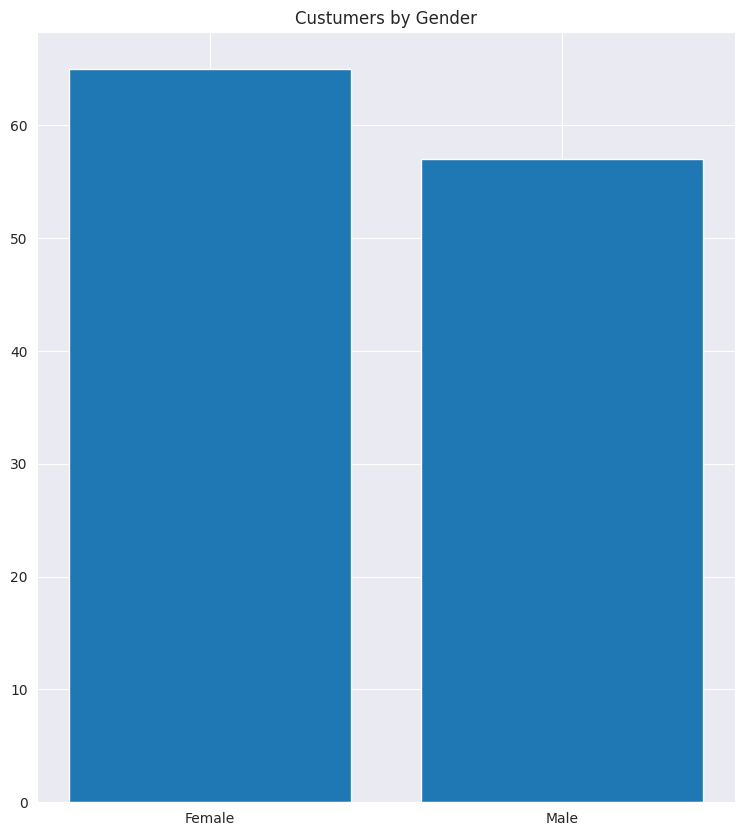

In [ ]:
plot_bar(feature='Gender',figsize=(9,10))

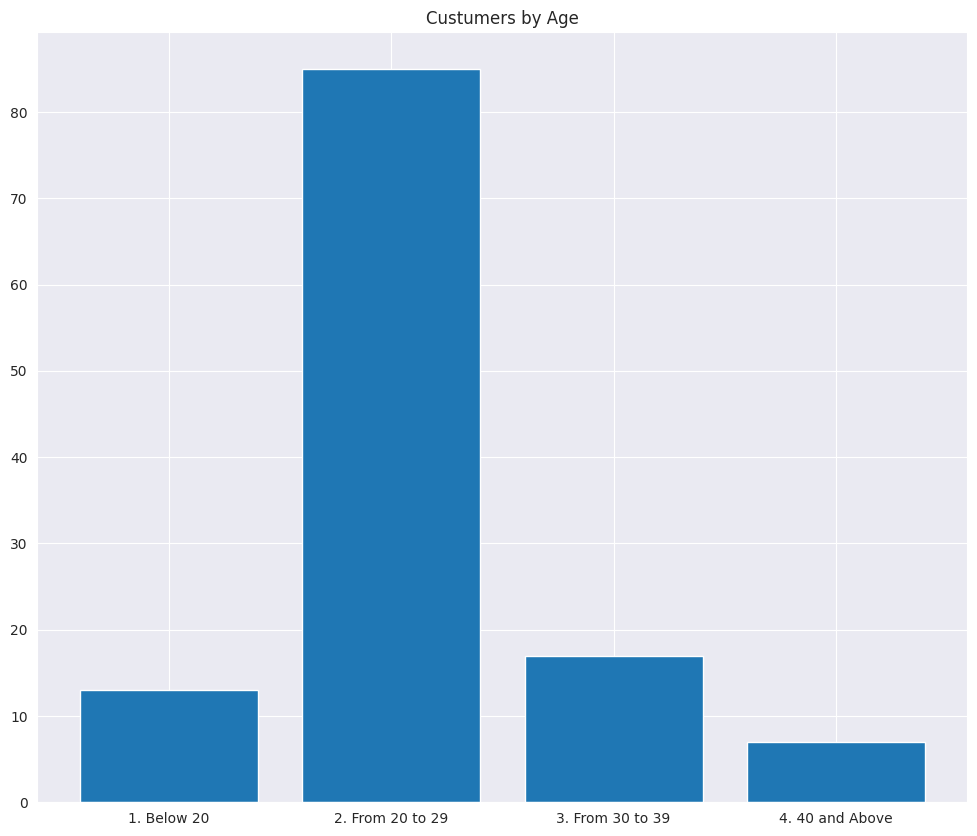

In [ ]:
### Age
data['Age'] = data['Age'].replace({'Below 20' : '1. Below 20',
                                    'From 20 to 29' : '2. From 20 to 29',
                                    'From 30 to 39' : '3. From 30 to 39',
                                    '40 and above' : '4. 40 and Above'})
data = data.sort_values('Age')

plot_bar(feature ='Age', figsize = (12,10))

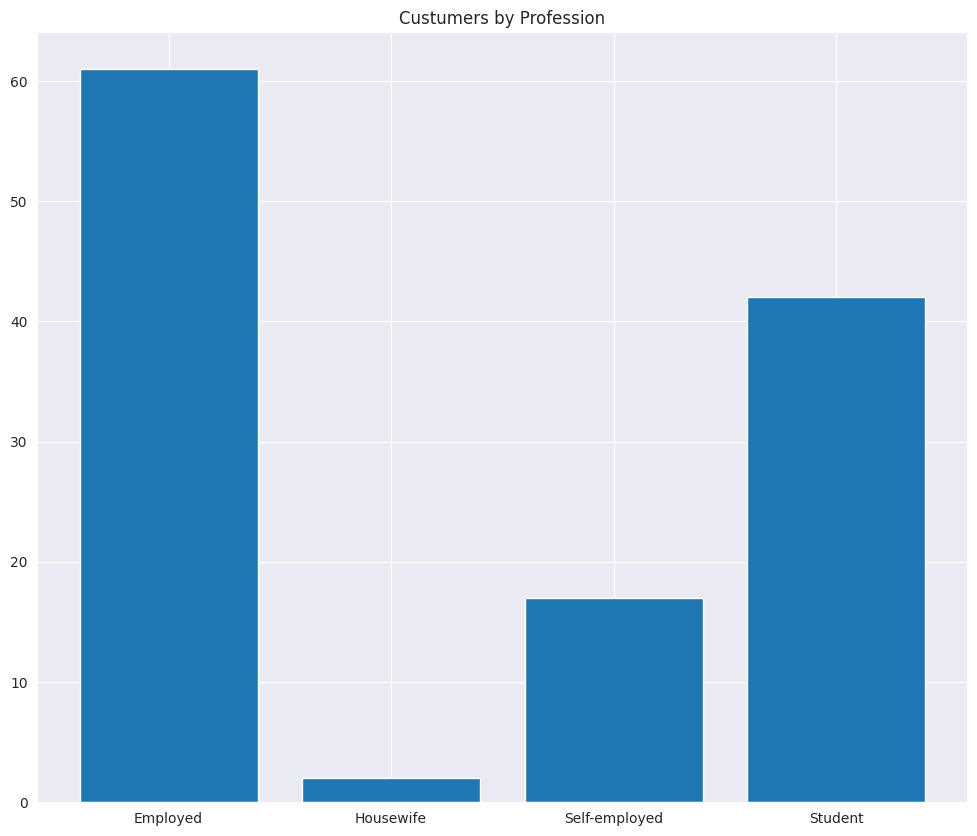

In [ ]:
### Profession
plot_bar(feature ='Profession', figsize = (12,10))

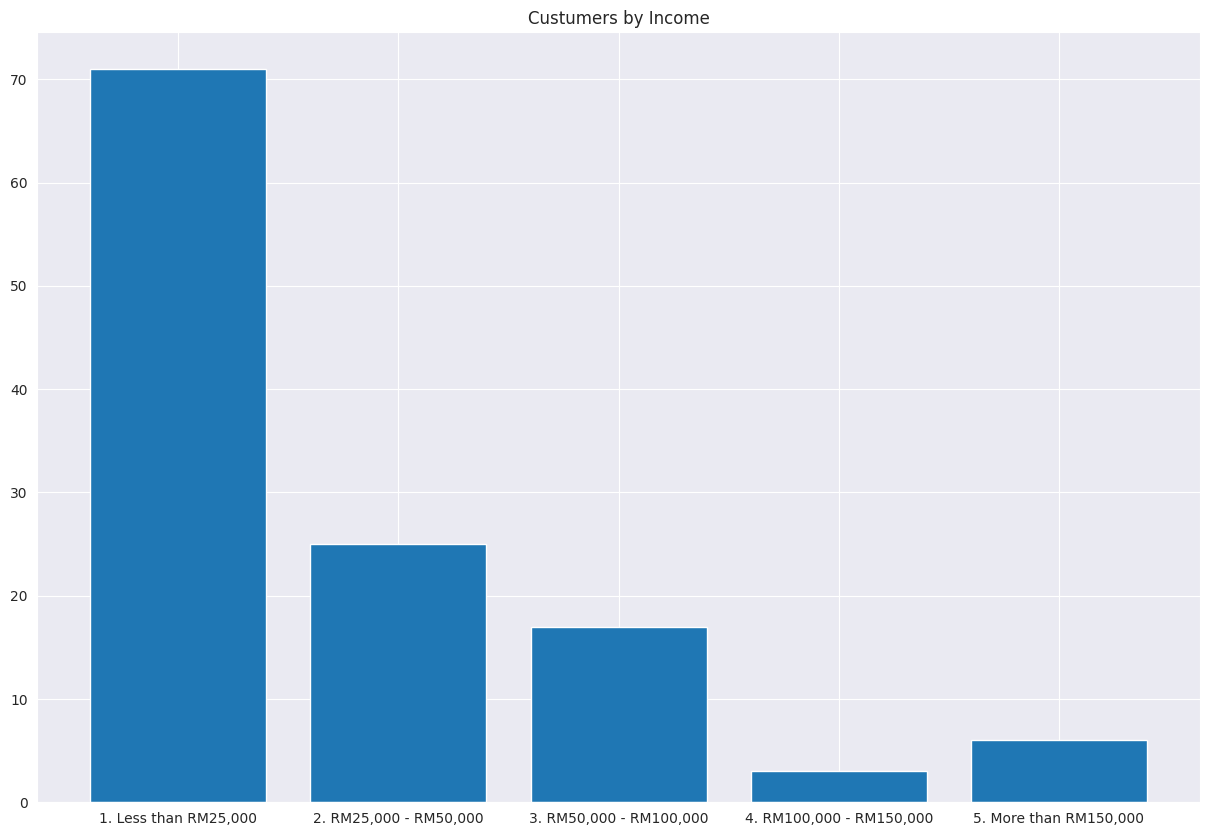

In [ ]:
### Income
data['Income'] = data['Income'].replace({'Less than RM25,000' : '1. Less than RM25,000',
                                        'RM25,000 - RM50,000' : '2. RM25,000 - RM50,000',
                                        'RM50,000 - RM100,000' : '3. RM50,000 - RM100,000',
                                        'RM100,000 - RM150,000' : '4. RM100,000 - RM150,000',
                                        'More than RM150,000' : '5. More than RM150,000'})
data = data.sort_values('Income')

plot_bar(feature ='Income', figsize = (15,10))

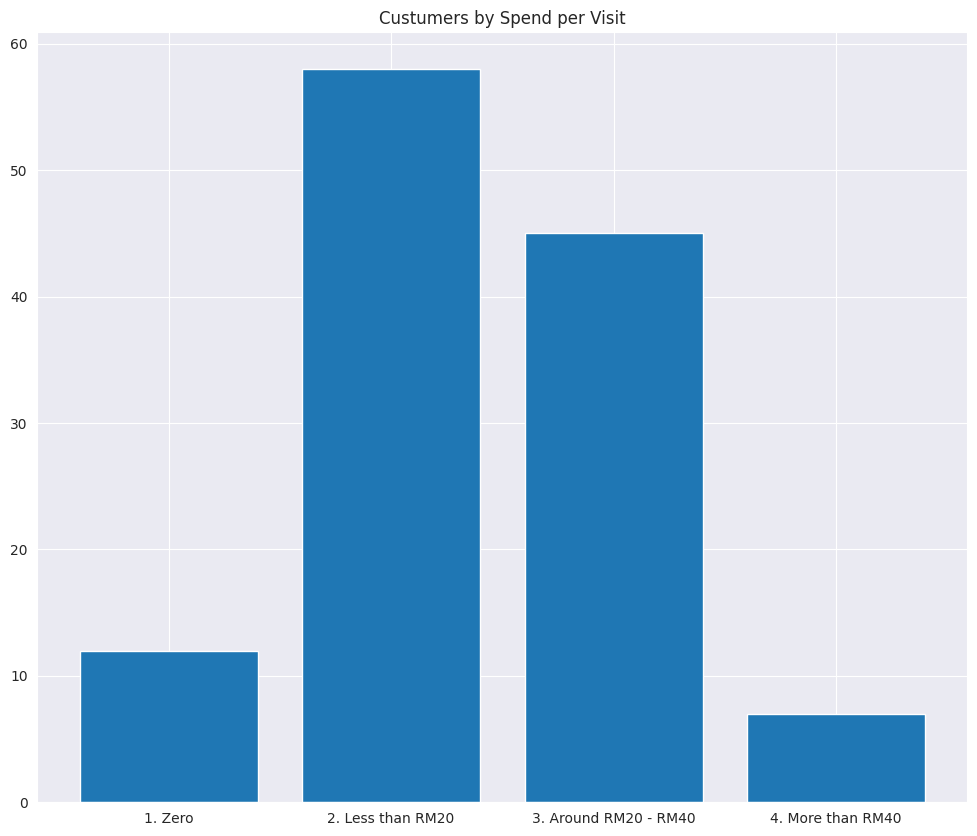

In [ ]:
### Amount spent per visit
data['Spend per Visit'] = data['Spend per Visit'].replace({'Zero' : '1. Zero',
                                        'Less than RM20' : '2. Less than RM20',
                                        'Around RM20 - RM40' : '3. Around RM20 - RM40',
                                        'More than RM40' : '4. More than RM40'})
data = data.sort_values('Spend per Visit')

plot_bar(feature ='Spend per Visit', figsize = (12,10))

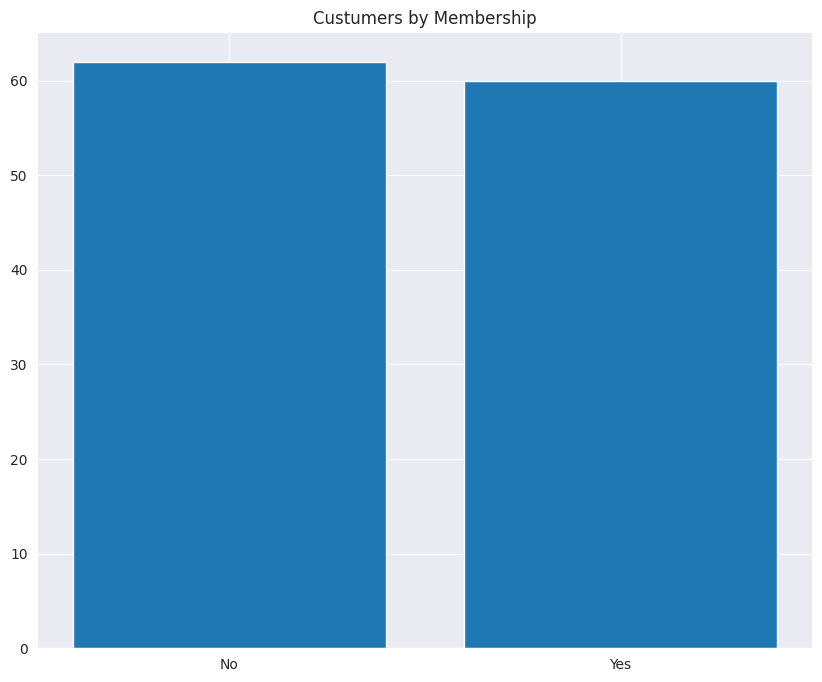

In [ ]:
### Membership
plot_bar(feature ='Membership', figsize = (10,8))

In [ ]:
### Change ALL categorical features to numeric

In [ ]:
data["Gender"].replace({"Female": 1, "Male": 0}, inplace=True)
data["Age"].replace({"1. Below 20": 0, "2. From 20 to 29": 1, "3. From 30 to 39": 2, "4. 40 and Above": 3}, inplace=True)
data["Profession"].replace({"Student": 0, "Employed": 1, "Self-employed": 2, "Housewife": 3}, inplace=True)
data["Income"].replace({"1. Less than RM25,000": 0, "2. RM25,000 - RM50,000": 1, "3. RM50,000 - RM100,000": 2, "4. RM100,000 - RM150,000": 3, "5. More than RM150,000": 4}, inplace=True)
data["Visit Frequency"].replace({"Never": 0, "Rarely": 1, "Monthly": 2, "Weekly": 3, "Daily": 4}, inplace=True)
data["Prefered Form of Consumption"].replace({"None": 0, "Take away": 1, "Drive-thru": 2, "Dine in": 3}, inplace=True)
data["Time Spent on Visit"].replace({"Below 30 minutes": 0, "Between 30 minutes to 1 hour": 1, "Between 1 hour to 2 hours": 2, "Between 2 hours to 3 hours": 3, "More than 3 hours": 4}, inplace=True)
data["Distance to Store"].replace({"within 1km": 0, "1km - 3km": 1, "more than 3km": 2}, inplace=True)
data["Membership"].replace({"No": 0, "Yes": 1}, inplace=True)
data["Spend per Visit"].replace({"1. Zero": 0, "2. Less than RM20": 1, "3. Around RM20 - RM40": 2, "4. More than RM40": 3}, inplace=True)
data["Custumer Loyalty"].replace({"No": 0, "Yes": 1}, inplace=True)

In [ ]:
data1=data.drop(["Timestamp", "Most consumed Product","Form of communication to Promotions"],axis=1)
data1.head()

,Gender,Age,Profession,Income,Visit Frequency,Prefered Form of Consumption,Time Spent on Visit,Distance to Store,Membership,Spend per Visit,Quality Rate,Price Range Rate,Sales and Promotion Importance,Ambiance Rate,WiFi Quality Rate,Service Rate,Likely for Meetings or Hangouts,Custumer Loyalty
89,0,1,2,1,1,3,0,1,1,0,5,5,5,5,4,5,5,1
110,0,1,0,0,1,1,0,2,0,0,4,2,3,5,4,4,2,0
92,1,1,1,1,0,3,0,0,0,0,3,3,3,3,3,3,3,0
47,1,1,2,0,1,1,1,2,0,0,3,1,5,4,3,3,2,1
81,0,1,1,0,0,0,0,2,0,0,1,1,1,3,3,3,3,0


In [ ]:
#### Descriptive Analysis
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,122.0,0.532787,0.500981,0.0,0.0,1.0,1.0,1.0
Age,122.0,1.147541,0.676307,0.0,1.0,1.0,1.0,3.0
Profession,122.0,0.827869,0.723771,0.0,0.0,1.0,1.0,3.0
Income,122.0,0.754098,1.100800,0.0,0.0,0.0,1.0,4.0
Visit Frequency,122.0,1.336066,0.788457,0.0,1.0,1.0,2.0,4.0
Prefered Form of Consumption,122.0,1.860656,0.998475,0.0,1.0,2.0,3.0,3.0
Time Spent on Visit,122.0,0.565574,0.833074,0.0,0.0,0.0,1.0,4.0
Distance to Store,122.0,1.278689,0.805583,0.0,1.0,1.5,2.0,2.0
Membership,122.0,0.491803,0.501994,0.0,0.0,0.0,1.0,1.0
Spend per Visit,122.0,1.385246,0.743531,0.0,1.0,1.0,2.0,3.0


<Axes: >

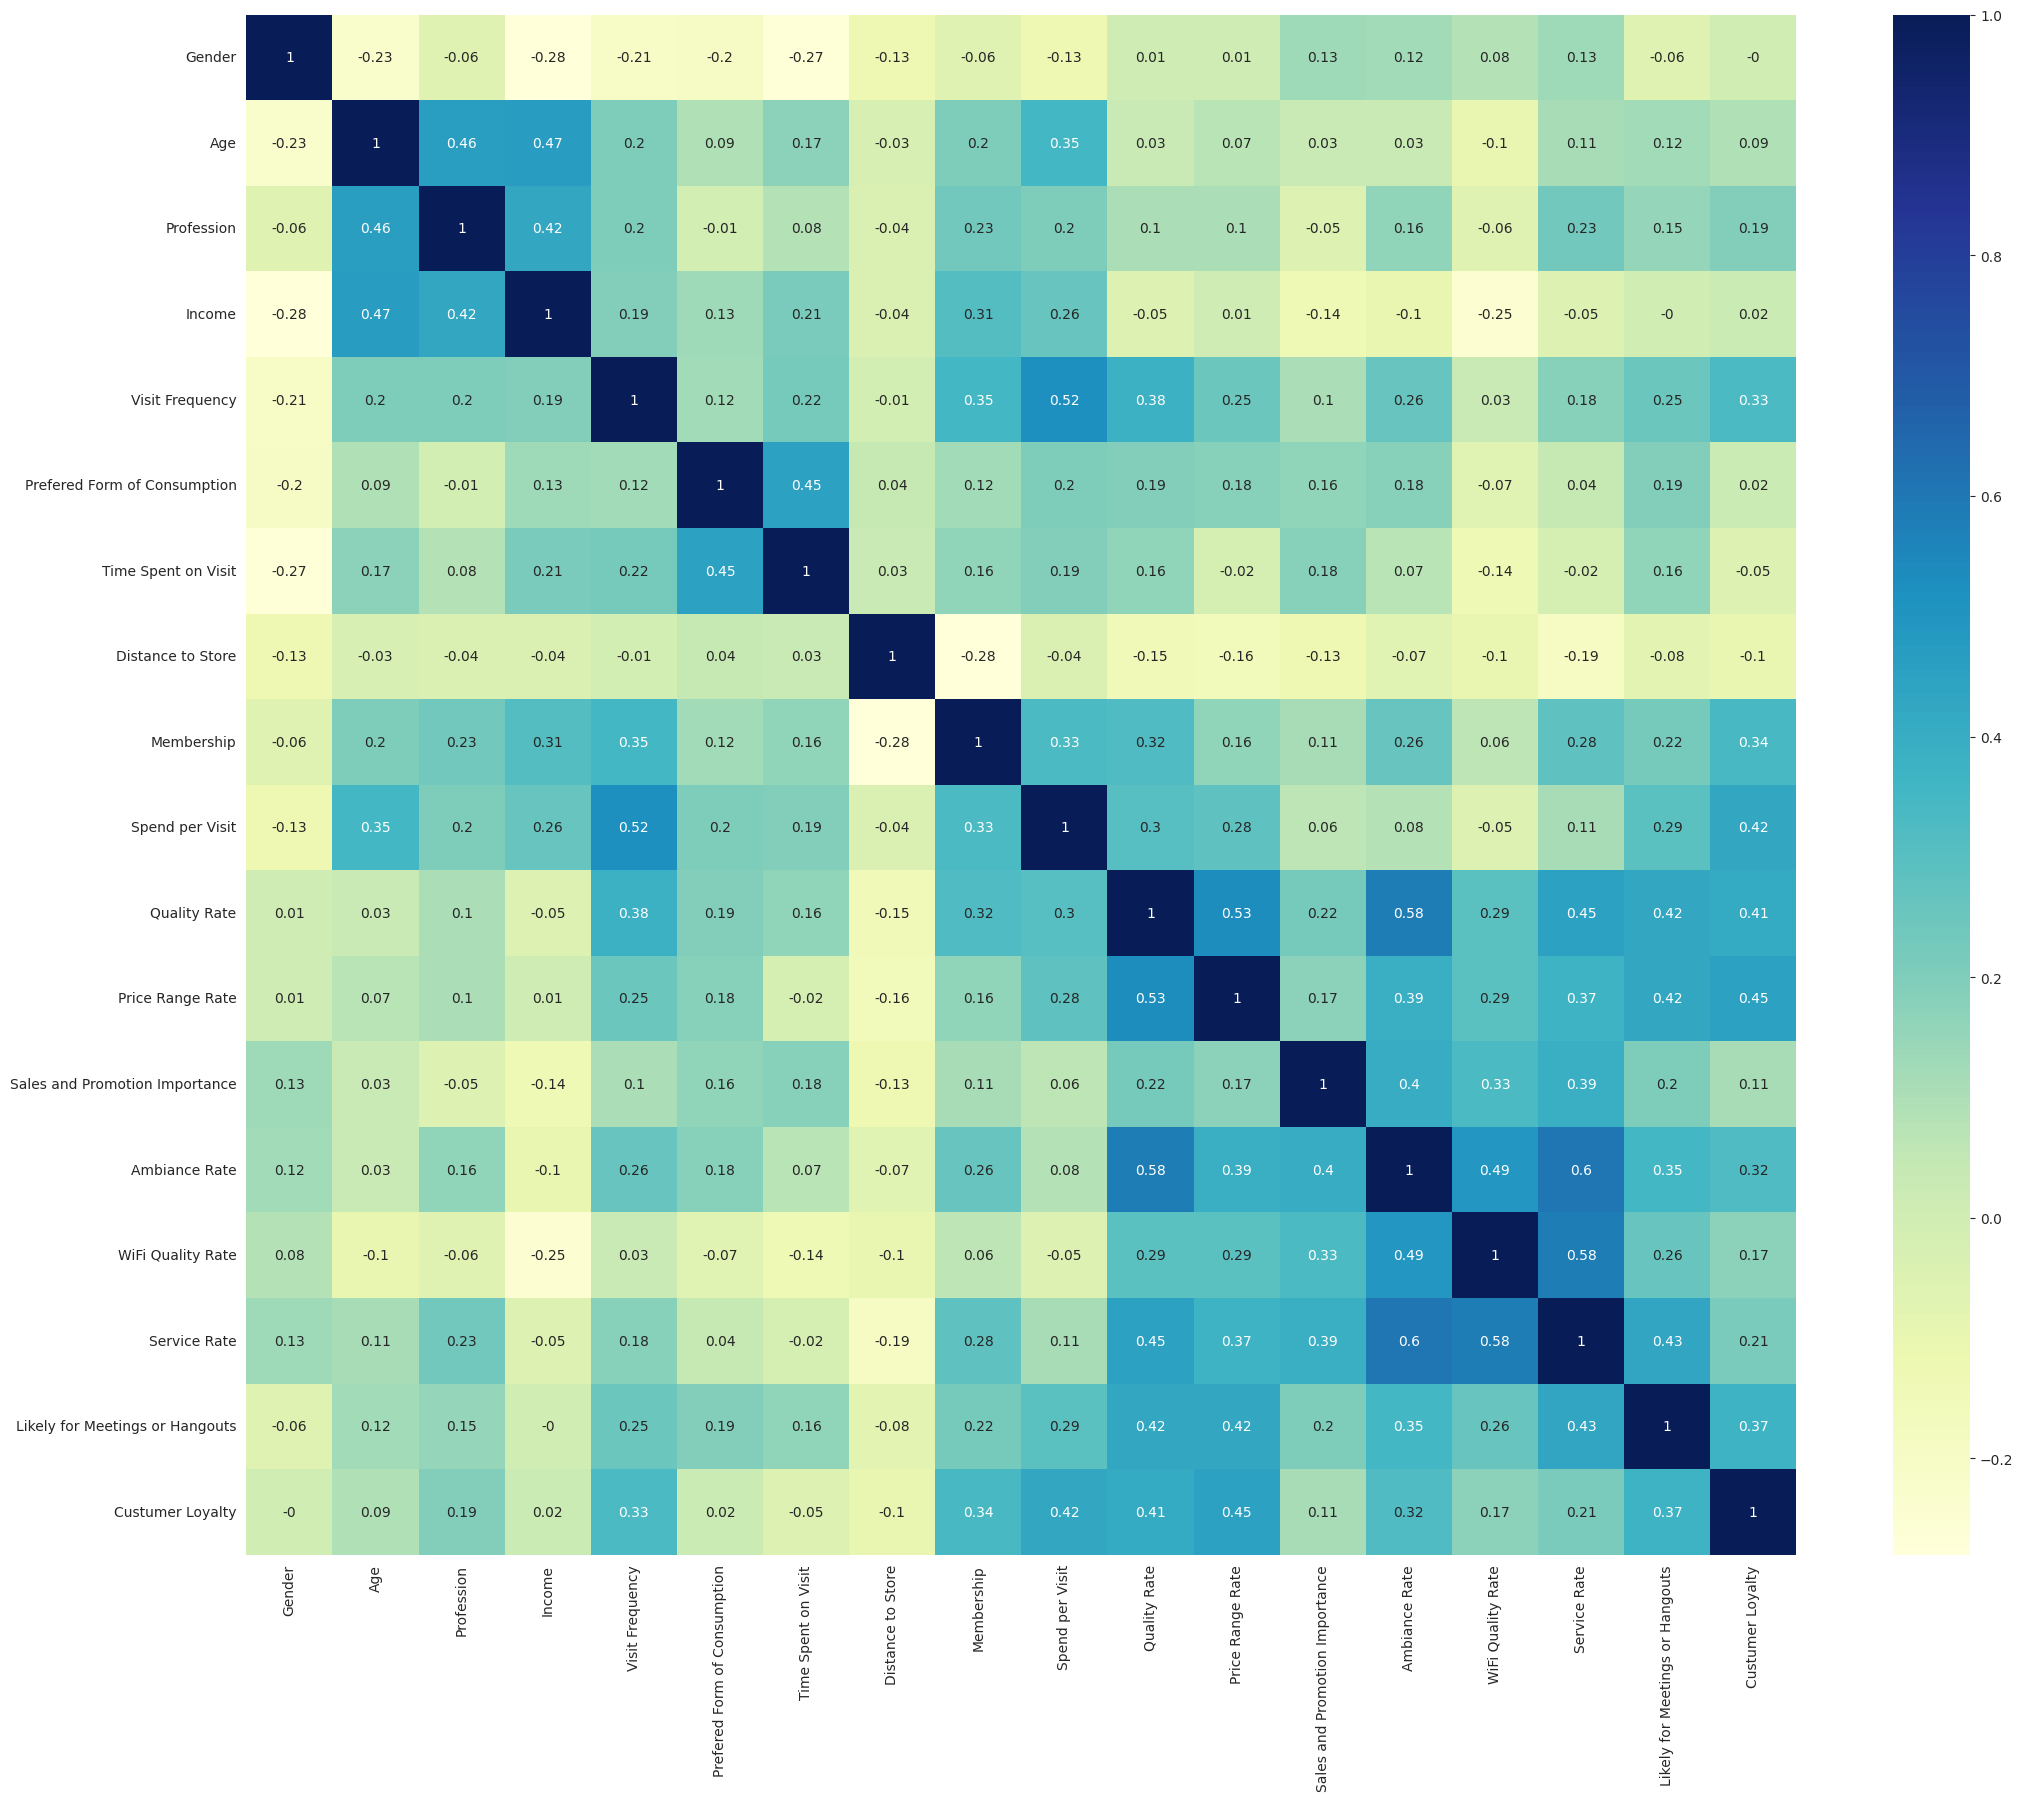

In [ ]:
### Inferential Analysis
#Visualize the correlation
corr = data1.corr().round(2)
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [ ]:
y = data1['Custumer Loyalty'].values
X=data1.drop(["Custumer Loyalty"],axis=1)

In [ ]:
#K-Means & PCA for Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

cluster_range = range(1, 10,1)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(principalComponents)
  cluster_errors.append(clusters.inertia_)


clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
kmeans = KMeans(n_clusters=3)
model= kmeans.fit(principalComponents)
y_kmeans = kmeans.predict(principalComponents)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2], dtype=int32)

In [ ]:
### Examine the contribution of each features to the 1st & 2nd component
pca.components_
df = pd.DataFrame(pca.components_,columns=X.columns)
df

,Gender,Age,Profession,Income,Visit Frequency,Prefered Form of Consumption,Time Spent on Visit,Distance to Store,Membership,Spend per Visit,Quality Rate,Price Range Rate,Sales and Promotion Importance,Ambiance Rate,WiFi Quality Rate,Service Rate,Likely for Meetings or Hangouts
0,-0.005613,-0.052346,-0.075731,0.015998,-0.181952,-0.165096,-0.088677,0.092272,-0.101977,-0.145667,-0.383375,-0.405655,-0.313085,-0.382446,-0.288703,-0.326389,-0.370376
1,-0.142737,0.266137,0.235235,0.636650,0.216903,0.271091,0.268670,0.014758,0.118671,0.258306,0.025489,0.032882,-0.181124,-0.109763,-0.331152,-0.108687,0.079598


In [ ]:
data_final = data1.copy()
data_final['Cluster'] = y_kmeans
data_final.head()

,Gender,Age,Profession,Income,Visit Frequency,Prefered Form of Consumption,Time Spent on Visit,Distance to Store,Membership,Spend per Visit,Quality Rate,Price Range Rate,Sales and Promotion Importance,Ambiance Rate,WiFi Quality Rate,Service Rate,Likely for Meetings or Hangouts,Custumer Loyalty,Cluster
89,0,1,2,1,1,3,0,1,1,0,5,5,5,5,4,5,5,1,1
110,0,1,0,0,1,1,0,2,0,0,4,2,3,5,4,4,2,0,2
92,1,1,1,1,0,3,0,0,0,0,3,3,3,3,3,3,3,0,2
47,1,1,2,0,1,1,1,2,0,0,3,1,5,4,3,3,2,1,2
81,0,1,1,0,0,0,0,2,0,0,1,1,1,3,3,3,3,0,2


In [ ]:
### Number of customer present in each cluster

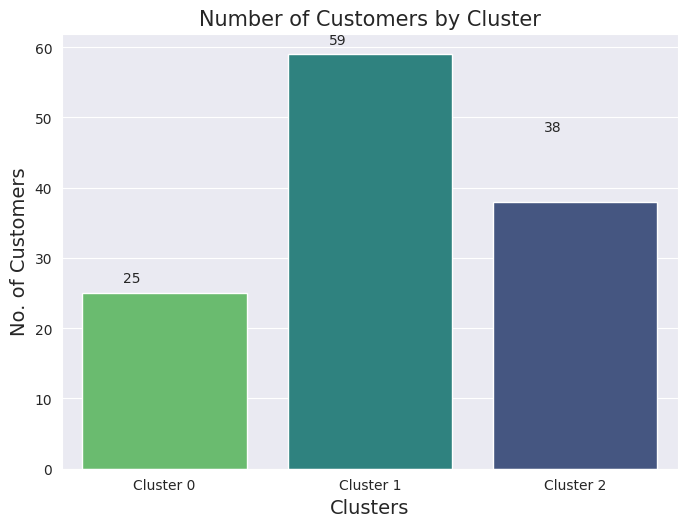

In [ ]:
sns.countplot(data = data_final, x = 'Cluster', palette = 'viridis_r')
plt.title('Number of Customers by Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('No. of Customers', fontsize = 14)
plt.xticks([0, 1, 2], ['Cluster 0', 'Cluster 1', 'Cluster 2'], rotation = 0)
plt.text(x = 0 - 0.2, y = data_final.Cluster.value_counts()[0] + 1.5, s = data_final.Cluster.value_counts()[0])
plt.text(x = 1 - 0.2, y = data_final.Cluster.value_counts()[1] + 1.5, s = data_final.Cluster.value_counts()[1])
plt.text(x = 2 - 0.15, y = data_final.Cluster.value_counts()[2] + 10, s = data_final.Cluster.value_counts()[2])
plt.tight_layout(pad = -1)
plt.show()

<Axes: xlabel='Cluster', ylabel='count'>

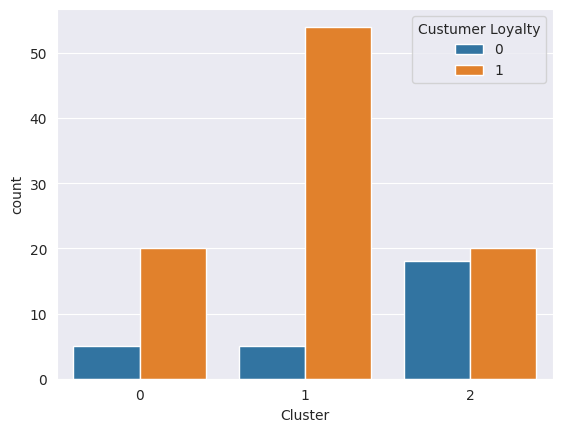

In [ ]:
##Cluster distribution by Customer loyalty
sns.countplot(x='Cluster', hue='Custumer Loyalty', data=data_final)

<Axes: xlabel='Cluster', ylabel='count'>

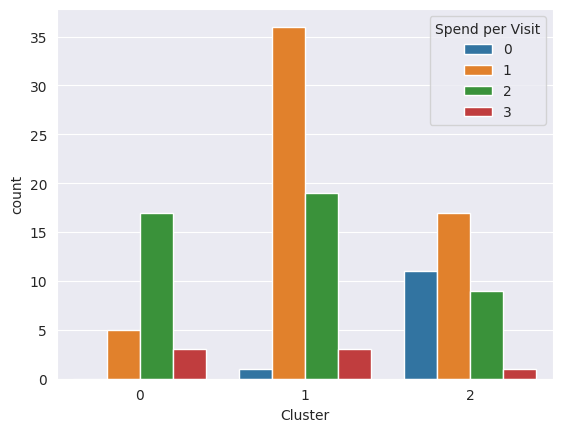

In [ ]:
##Cluster distribution by Spend per Visit
sns.countplot(x='Cluster', hue='Spend per Visit', data=data_final)

In [ ]:
### MACHINE LEARNING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, f1_score, auc
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
## Train-Test Split
#y = data1['Custumer Loyalty'].values
#X=data1.drop(["Custumer Loyalty"],axis=1)

### Normalize the data set
sc = StandardScaler().fit(X)
X_std = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size= 0.20, random_state=1611)

In [ ]:
### LOGISTIC REGRESSION MODEL

In [ ]:
param_grid = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1,1.5,2,2.5,3,3.5]}

optimal_params = GridSearchCV(LogisticRegression(),
                             param_grid,
                             cv=10, # 10-fold as in k-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
best_C = optimal_params.best_params_['C']
best_penalty = optimal_params.best_params_['penalty']

In [ ]:
### Fit the best model
clf_lr = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_train, y_train)

In [ ]:
### Make prediction with the best model
y_pred = clf_lr.predict(X_test)

In [ ]:
###Logistic Regression Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
test_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', test_auc)

Test Accuracy: 0.84
Test Precision: 0.8947368421052632
Test Recall: 0.8095238095238095
Test F1-score: 0.8947368421052632
Test AUC: 0.780701754385965


In [ ]:
### SUPPORT VECTOR MACHINE (SVM)

In [ ]:
param_grid = [
    {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=10, # 10fold as in k-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
C = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

In [ ]:
clf_svm = SVC(random_state=114, C=C, gamma=gamma, kernel=kernel)
clf_svm.fit(X_train, y_train)

SVC(C=3, kernel='linear', random_state=114)

In [ ]:
### Make prediction with the best model
y_pred = clf_svm.predict(X_test)

In [ ]:
###SVM Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
test_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', test_auc)

Test Accuracy: 0.8
Test Precision: 0.8888888888888888
Test Recall: 0.8
Test F1-score: 0.8648648648648649
Test AUC: 0.7543859649122807


In [ ]:
### GAUSSIAN NAIVE BAYES

In [ ]:
params = {
    'alpha': [0.01,0.1,0.5,1.0,10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.1,]* 2,],
    'binarize': [None,0.0,8.5,10.0]
}

In [ ]:
nb_grid = GridSearchCV(
BernoulliNB(),
param_grid=params,
    n_jobs=-1,
    cv=10,
    )

In [ ]:
### fit the best model
nb_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'binarize': [None, 0.0, 8.5, 10.0],
                         'class_prior': [None, [0.1, 0.1]],
                         'fit_prior': [True, False]})

In [ ]:
optimised_nb = nb_grid.best_estimator_

In [ ]:
### make prediction with the best model
y_pred = optimised_nb.predict(X_test)

In [ ]:
### Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
test_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', test_auc)

Test Accuracy: 0.76
Test Precision: 0.76
Test Recall: 1.0
Test F1-score: 0.8636363636363636
Test AUC: 0.5


In [ ]:
#### DECISION TREE CLASSIFICATION MODEL

In [ ]:
param_grid = {'criterion': ['gini'], 
              'max_depth': range(2,15)}

optimal_params = GridSearchCV(tree.DecisionTreeClassifier(),
                             param_grid,
                             cv=10, # 10-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 7}


In [ ]:
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']

In [ ]:
dt = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_train, y_train)

In [ ]:
### Make prediction with the best model
y_pred = dt.predict(X_test)

In [ ]:
###Decision Tree Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
test_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', test_auc)

Test Accuracy: 0.68
Test Precision: 0.8235294117647058
Test Recall: 0.8235294117647058
Test F1-score: 0.7777777777777778
Test AUC: 0.618421052631579


In [ ]:
### RANDOM FOREST CLASSIFICATION MODEL

In [ ]:
# Number of trees in decision tree
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = range(1,10)

# measure the quality of a split
criterion = ['gini']

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap}

In [ ]:
optimal_params = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv=10, #10-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 40}


In [ ]:
bootstrap = optimal_params.best_params_['bootstrap']
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']
max_features = optimal_params.best_params_['max_features']
n_estimators = optimal_params.best_params_['n_estimators']


rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_features=max_features, 
                             max_depth=max_depth, 
                             criterion=criterion,
                             bootstrap=bootstrap,
                             random_state=4)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=40,
                       random_state=4)

In [ ]:
### Make prediction
y_pred = rfc.predict(X_test)

In [ ]:
### Random Forest Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.84
Test Precision: 0.9411764705882353
Test Recall: 0.7619047619047619
Test F1-score: 0.8888888888888888
Test AUC: 0.8377192982456141


In [ ]:
#### EXTREME GRADIENT BOOSTED MODEL

In [ ]:
estimator = xgb.XGBClassifier(
objective= 'binary:logistic',
nthread=4,
seed=15
)

In [ ]:
parameters = {
    'max_depth':range(2,10,1),
    'n_estimators':range(60,220,40),
    'learning_rate':[0.1,0.01,0.05]
}

In [ ]:
grid_search=GridSearchCV(
estimator=estimator,
param_grid=parameters,
scoring='accuracy',
n_jobs=-1,
cv=10)

In [ ]:
### Fit the best model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy')

In [ ]:
optimised_xgb = grid_search.best_estimator_

In [ ]:
### make prediction with the best model
y_pred = optimised_xgb.predict(X_test)

In [ ]:
###XGB Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
test_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', test_auc)

Test Accuracy: 0.8
Test Precision: 0.8888888888888888
Test Recall: 0.8
Test F1-score: 0.8648648648648649
Test AUC: 0.7543859649122807


In [ ]:
### DEEP LEARNING MODEL

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 3s 376ms/step - loss: 0.6204 - accuracy: 0.5974 - val_loss: 0.6381 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6699 - accuracy: 0.6364 - val_loss: 0.6184 - val_accuracy: 0.6500
Epoch 3/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6259 - accuracy: 0.6883 - val_loss: 0.6018 - val_accuracy: 0.7000
Epoch 4/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5662 - accuracy: 0.7143 - val_loss: 0.5851 - val_accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 45ms/step - loss: 0.5582 - accuracy: 0.7273 - val_loss: 0.5698 - val_accuracy: 0.8000
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6436 - accuracy: 0.6753 - val_loss: 0.5550 - val_accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 48ms/step - loss: 0.5624 - accuracy: 0.6753 - val_loss: 0.5405 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

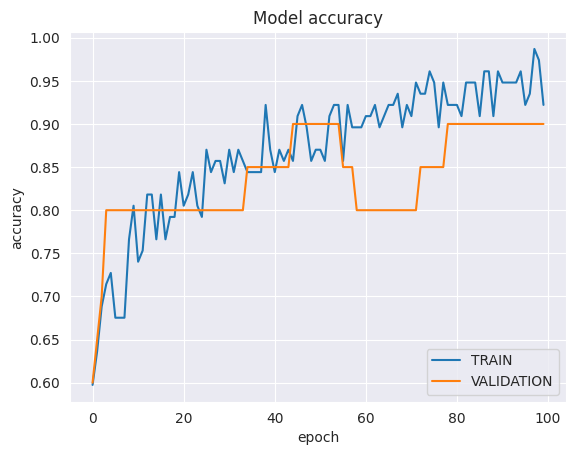

In [ ]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VALIDATION'], loc='lower right')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 48ms/step - loss: 0.4350 - accuracy: 0.8400
Test loss: 0.43504706025123596
Test accuracy: 0.8399999737739563
